In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import Functions

In [2]:
df_rds = pd.read_csv("_roads.tsv", delimiter='\t', low_memory = False)

In [3]:
# Prepare an empty list to collect the restructured data
restructured_data = []

# Iterate over each row in the initial dataframe
for index, row in df_rds.iterrows():
    road_name = row['road']
    # Iterate over the columns in groups of three starting from the second column
    for i in range(1, len(df_rds.columns), 3):
        try:
            # Extract lsrp, lat, and lon values
            lsrp = row[i]
            lat = row[i+1]
            lon = row[i+2]
            # Append the data to the list if lsrp is not NaN (indicating a valid section)
            if pd.notnull(lsrp):
                restructured_data.append([road_name, lsrp, lat, lon])
        except IndexError:
            # Break the loop if we've reached the end of the row's columns
            break

# Convert the list into a DataFrame
df_restructured = pd.DataFrame(restructured_data, columns=['road', 'lsrp', 'lat', 'lon'])

# Display the first few rows of the restructured dataframe to verify the transformation
df_restructured.head(5)

C:\Users\julia\AppData\Local\Temp\ipykernel_1144\15748790.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lsrp = row[i]
C:\Users\julia\AppData\Local\Temp\ipykernel_1144\15748790.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[i+1]
C:\Users\julia\AppData\Local\Temp\ipykernel_1144\15748790.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon = row[i+2]


,road,lsrp,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583


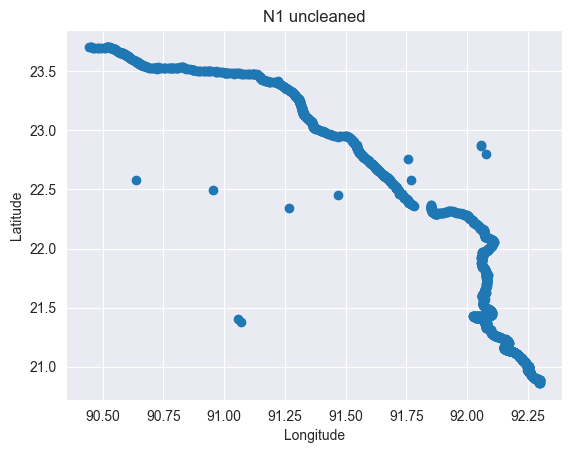

In [4]:
df_N1 = df_restructured[df_restructured['road'] == 'N1']
plt.scatter(df_N1['lon'], df_N1['lat'])
plt.title('N1 uncleaned')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

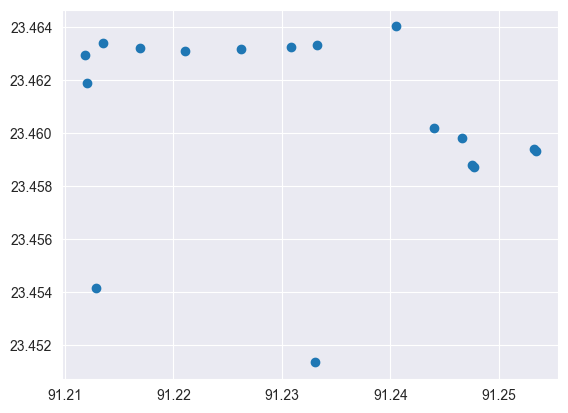

In [5]:
df_N101 = df_restructured[df_restructured['road'] == 'N101']
plt.scatter(df_N101['lon'], df_N101['lat'])
plt.show()

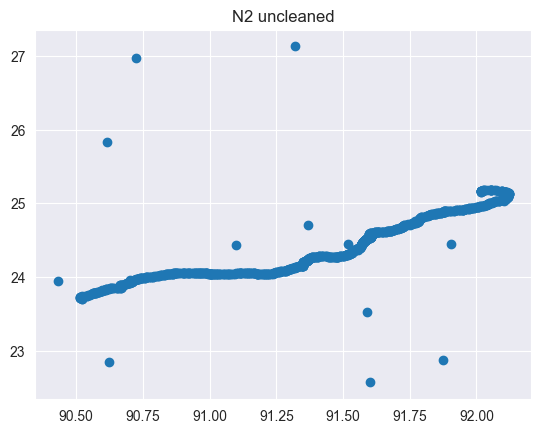

In [6]:
df_N102 = df_restructured[df_restructured['road'] == 'N2']
plt.scatter(df_N102['lon'], df_N102['lat'])
plt.title('N2 uncleaned')
plt.show()

In [7]:
df_restructured['road'].unique()

array(['N1', 'N101', 'N102', 'N103', 'N104', 'N105', 'N106', 'N107',
       'N108', 'N109', 'N110', 'N111', 'N112', 'N119', 'N120', 'N123',
       'N124', 'N125', 'N126', 'N127', 'N128', 'N129', 'N2', 'N203',
       'N204', 'N205', 'N206', 'N207', 'N208', 'N209', 'N210', 'N211',
       'N212', 'N213', 'N3', 'N302', 'N303', 'N309', 'N4', 'N401', 'N402',
       'N403', 'N404', 'N405', 'N406', 'N407', 'N408', 'N5', 'N501',
       'N502', 'N503', 'N504', 'N505', 'N506', 'N507', 'N508', 'N509',
       'N510', 'N511', 'N513', 'N514', 'N515', 'N516', 'N517', 'N518',
       'N519', 'N520', 'N540', 'N6', 'N602', 'N603', 'N604', 'N605', 'N7',
       'N701', 'N702', 'N703', 'N704', 'N705', 'N706', 'N707', 'N708',
       'N709', 'N710', 'N711', 'N712', 'N715', 'N8', 'N801', 'N802',
       'N803', 'N804', 'N805', 'N806', 'N808', 'N809', 'R110', 'R111',
       'R112', 'R113', 'R114', 'R120', 'R140', 'R141', 'R142', 'R143',
       'R144', 'R145', 'R147', 'R151', 'R152', 'R160', 'R161', 'R162',
      

In [8]:
df1 = df_restructured

In [9]:
def calc_dist_df(df):
    df_dist = pd.DataFrame()

    prev_lat = df['lat'].shift()
    prev_lon = df['lon'].shift()
    
    df_dist['Distance'] = np.sqrt((prev_lat-df['lat'])**2 + (prev_lon-df['lon'])**2)
        
    return df_dist

In [10]:
df_dist = calc_dist_df(df1)

In [11]:
df_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [12]:
df_dist.quantile(0.8)

Distance    0.007225
Name: 0.8, dtype: float64

In [13]:
df_dist[df_dist['Distance'] > df_dist['Distance'].quantile(0.8)*50]

,Distance
69,1.005876
70,0.999083
154,1.002543
155,0.999171
233,1.007321
...,...
51998,0.635694
52172,1.000792
52173,0.997039
52193,0.998972


In [14]:
df1_dist = calc_dist_df(df1)

In [15]:
df1_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [16]:
print("test")

test


In [20]:
Functions.restructure_df(df_rds)

NameError: name 'df_rds' is not defined

In [18]:
df_rds

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
